# Lecture 5 – Data 100, Spring 2022

Notebook by Lisa Yan<br/>
Content by Lisa Yan, Joseph Gonzalez, Deborah Nolan, Sam Lau

In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
#pd.set_option('precision', 2)
# This option stops scientific notation for pandas
pd.set_option('display.float_format', '{:.2f}'.format)


# Structure: File Formats

### Reproducible Data Science

In the interest of **reproducible data science** we will download the data programatically.  We have defined some helper functions in the [ds100_utils.py](ds100_utils.py) file.  I can then reuse these helper functions in many different notebooks.

In [4]:
from ds100_utils import fetch_and_cache

Occasionally, you will want to modify code that you have imported.  To reimport those modifications you can either use the python importlib library:

```python
from importlib import reload
reload(utils)
```

or use iPython magic which will intelligently import code when files change:

```python
%load_ext autoreload
%autoreload 2
```

###  Downloading the Data

Notice that because I record how I got the data in the notebook, others can reproduce this experiment.  However, it is worth noting that **the data can change**.  We will want to pay attention to file timestamps.

## 1) CSV 
Restaurant food safety scores for restaurants in San Francisco. The scores and violation information have been made available by the [San Francisco Department of Public Health](https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i).

In [5]:
restaurants_file = fetch_and_cache(
    "https://data.sfgov.org/api/views/pyih-qa8i/rows.csv", # DL from this website
    "restaurants.csv",         # save as this file
    force=False)               # do nothing if the file already exists

Using cached version that was downloaded (UTC): Fri Apr 29 10:22:17 2022


Before we even begin to load the data it often helps to understand a little about the high-level structure:

1. How big is the data file?
1. How is the data file formatted?
1. How do we read the data into pandas?

### 1. How big is the data?

I often like to start my analysis by getting a rough estimate of the size of the data.  This will help inform the tools I use and how I view the data.  If it is relatively small I might use a text editor or a spreadsheet to look at the data.  If it is larger, I might jump to more programmatic exploration or even used distributed computing tools.

However here we will use python tools to probe the file.

In [6]:
import os
print(restaurants_file, "is", os.path.getsize(restaurants_file) / 1e6, "MB")

data\restaurants.csv is 12.093999 MB


Since these seem to be text files I might also want to investigate the number of lines, which often corresponds to the number of records.

In [7]:
with open(restaurants_file, "r") as f:
    print(restaurants_file, "is", sum(1 for l in f), "lines.")

data\restaurants.csv is 53974 lines.


### 2. How is the data file formatted?

Let's assume that these are text files (and do not contain binary encoded data) so we can print a "few lines" to get a better understanding of the file.

Notice that below I use the `repr` function to return the raw string with special characters.  This is helpful in deducing the file format.

In [8]:
print(restaurants_file, "======================")
with open(restaurants_file, "r") as f:
    for i in range(10):
        print(f"{i:03} | {repr(f.readline())}") # zero pad line numbers

data\restaurants.csv ======================
000 | 'business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods\n'
001 | '835,Kam Po Kitchen,801 Broadway St,San Francisco,CA,94133,37.797223,-122.410513,POINT (-122.410513 37.797223),,835_20180917,09/17/2018 12:00:00 AM,88,Routine - Unscheduled,835_20180917_103139,Improper food storage,Low Risk,107,107,6,3,6\n'
002 | "905,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,94108,37.790477,-122.404033,POINT (-122.404033 37.790477),,905_20190415,04/15/2019 12:00:00 AM,87,Routine - Unscheduled,905_20190415_103114,High risk vermin infestation,High Risk,19,19,6,3,8\n"
003 | "1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,

### 3. How do we read the data into pandas?

With CSVs, we can use the handy `pd.read_csv` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=read_csv):

In [9]:
restaurants = pd.read_csv(restaurants_file)
restaurants.head()

,business_id,business_name,business_address,business_city,...,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,835,Kam Po Kitchen,801 Broadway St,San Francisco,...,107.00,6.00,3.00,6.00
1,905,Working Girls' Cafe',0259 Kearny St,San Francisco,...,19.00,6.00,3.00,8.00
2,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,...,5.00,8.00,4.00,11.00
3,1345,Cordon Bleu,1574 California St,San Francisco,...,105.00,4.00,3.00,21.00
4,1352,LA TORTILLA,495 Castro St B,San Francisco,...,38.00,3.00,5.00,5.00


### Side Note: TSV

We won't go through all the steps for TSV, but here's how the same SF restaurants data would look like in a TSV:

In [10]:
restaurants_tsv_file = "data/restaurants.tsv"  # I processed this earlier

print(restaurants_tsv_file, "======================")
with open(restaurants_tsv_file, "r") as f:
    for i in range(10):
        print(f"{i:03} | {repr(f.readline())}")

data/restaurants.tsv ======================
000 | '\tbusiness_id\tbusiness_name\tbusiness_address\tbusiness_city\tbusiness_state\tbusiness_postal_code\tbusiness_latitude\tbusiness_longitude\tbusiness_location\tbusiness_phone_number\tinspection_id\tinspection_date\tinspection_score\tinspection_type\tviolation_id\tviolation_description\trisk_category\tNeighborhoods\tSF Find Neighborhoods\tCurrent Police Districts\tCurrent Supervisor Districts\tAnalysis Neighborhoods\n'
001 | '0\t835\tKam Po Kitchen\t801 Broadway St\tSan Francisco\tCA\t94133\t37.797223\t-122.410513\tPOINT (-122.410513 37.797223)\t\t835_20180917\t09/17/2018 12:00:00 AM\t88.0\tRoutine - Unscheduled\t835_20180917_103139\tImproper food storage\tLow Risk\t107.0\t107.0\t6.0\t3.0\t6.0\n'
002 | "1\t905\tWorking Girls' Cafe'\t0259 Kearny St\tSan Francisco\tCA\t94108\t37.790477\t-122.404033\tPOINT (-122.404033 37.790477)\t\t905_20190415\t04/15/2019 12:00:00 AM\t87.0\tRoutine - Unscheduled\t905_20190415_103114\tHigh risk vermin infe

The `pd.read_csv` function also reads in TSVs if we specify the `'\t'` delimiter.

In [11]:
restaurants_tsv = pd.read_csv(restaurants_tsv_file, delimiter='\t')
restaurants_tsv.head()

,Unnamed: 0,business_id,business_name,business_address,...,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,0,835,Kam Po Kitchen,801 Broadway St,...,107.00,6.00,3.00,6.00
1,1,905,Working Girls' Cafe',0259 Kearny St,...,19.00,6.00,3.00,8.00
2,2,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,...,5.00,8.00,4.00,11.00
3,3,1345,Cordon Bleu,1574 California St,...,105.00,4.00,3.00,21.00
4,4,1352,LA TORTILLA,495 Castro St B,...,38.00,3.00,5.00,5.00


<br/>
Note how records with special punctuation (e.g., a comma or apostrophe) are stored in the text file, and how `pd.read_csv` parses them.

In [12]:
# punctuation in a CSV record entry
with open(restaurants_file, "r") as f:
    for i, line in enumerate(f.readlines()):
        if "Mo'z Cafe," in line:
            print(f"{i:03} | {repr(line)}")
            break

062 | '81508,"Mo\'z Cafe, Inc.",36 05th St,San Francisco,CA,94103,,,,,81508_20190516,05/16/2019 12:00:00 AM,84,Routine - Unscheduled,81508_20190516_103162,Other low risk violation,Low Risk,,,,,\n'


In [13]:
# read_csv is smart!
restaurants[restaurants['business_name'].str.contains("Mo'z")].head()

,business_id,business_name,business_address,business_city,...,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
61,81508,"Mo'z Cafe, Inc.",36 05th St,San Francisco,...,NaN,NaN,NaN,NaN
18913,91619,Mo'z Cafe S.F. Inc,5 Masonic Ave,San Francisco,...,NaN,NaN,NaN,NaN
20034,91619,Mo'z Cafe S.F. Inc,5 Masonic Ave,San Francisco,...,NaN,NaN,NaN,NaN
22508,91619,Mo'z Cafe S.F. Inc,5 Masonic Ave,San Francisco,...,NaN,NaN,NaN,NaN
23468,81508,"Mo'z Cafe, Inc.",36 05th St,San Francisco,...,NaN,NaN,NaN,NaN


---
<br/><br/>


## 2) JSON
The City of Berkeley Open Data [website](https://data.cityofberkeley.info/Health/COVID-19-Confirmed-Cases/xn6j-b766) has a dataset with COVID-19 Confirmed Cases among Berkeley residents by date.

Let's download this file, saving it as a JSON (note the source URL file type):

In [14]:
covid_file = fetch_and_cache(
    "https://data.cityofberkeley.info/api/views/xn6j-b766/rows.json?accessType=DOWNLOAD",
    "confirmed-cases.json",
    force=False)

Using cached version that was downloaded (UTC): Fri Apr 29 10:22:17 2022


---
### 1. How big is the data file?

In [15]:
print(covid_file, "is", os.path.getsize(covid_file) / 1e6, "MB")

with open(covid_file, "r") as f:
    print(covid_file, "is", sum(1 for l in f), "lines.")

data\confirmed-cases.json is 0.116367 MB
data\confirmed-cases.json is 1110 lines.


<br/><br/>
### 2. How is the data file formatted?

In [16]:
# raw text
print(covid_file, "======================")
with open(covid_file, "r") as f:
    for i in range(20):
        print(f"{i:03} | {repr(f.readline())}") # zero pad line numbers

data\confirmed-cases.json ======================
000 | '{\n'
001 | '  "meta" : {\n'
002 | '    "view" : {\n'
003 | '      "id" : "xn6j-b766",\n'
004 | '      "name" : "COVID-19 Confirmed Cases",\n'
005 | '      "assetType" : "dataset",\n'
006 | '      "attribution" : "City of Berkeley",\n'
007 | '      "averageRating" : 0,\n'
008 | '      "category" : "Health",\n'
009 | '      "createdAt" : 1587074071,\n'
010 | '      "description" : "Counts of confirmed COVID-19 cases among Berkeley residents by date.",\n'
011 | '      "displayType" : "table",\n'
012 | '      "downloadCount" : 2804,\n'
013 | '      "hideFromCatalog" : false,\n'
014 | '      "hideFromDataJson" : false,\n'
015 | '      "newBackend" : true,\n'
016 | '      "numberOfComments" : 0,\n'
017 | '      "oid" : 37306599,\n'
018 | '      "provenance" : "official",\n'
019 | '      "publicationAppendEnabled" : false,\n'


This appears to be a fairly standard JSON file.  We notice that the file appears to contain a description of itself in a field called "meta" (which is presumably short for **metadata**).

<br/><br/>
### 3. How do we read the file into Pandas?

We'll come back to this question. Let's first understand more about the particular structure of this JSON file so that we can decide what (if anything) to load into Pandas. 



---
<br/><br/>

# Digging into JSON

Python has relatively good support for JSON data since it closely matches the internal python object model.  In the following cell we import the entire JSON datafile into a python dictionary.

In [17]:
import json

with open(covid_file, "rb") as f:
    covid_json = json.load(f)

The `covid_json` variable is now a dictionary encoding the data in the file:

In [18]:
type(covid_json)

dict

### Examine what keys are in the top level json object

We can list the keys to determine what data is stored in the object.

In [19]:
covid_json.keys()

dict_keys(['meta', 'data'])

**Observation**: The JSON dictionary contains a `meta` key which likely refers to meta data (data about the data).  Meta data often maintained with the data and can be a good source of additional information.

<br/>

We can investigate the meta data further by examining the keys associated with the metadata.

In [20]:
covid_json['meta'].keys()

dict_keys(['view'])

The `meta` key contains another dictionary called `view`.  This likely refers to meta-data about a particular "view" of some underlying database.  We will learn more about views when we study SQL later in the class.    

In [21]:
covid_json['meta']['view'].keys()

dict_keys(['id', 'name', 'assetType', 'attribution', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'approvals', 'columns', 'grants', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

Notice that this a nested/recursive data structure.  As we dig deeper we reveal more and more keys and the corresponding data:

```
meta
|-> data
    | ... (haven't explored yet)
|-> view
    | -> id
    | -> name
    | -> attribution 
    ...
    | -> description
    ...
    | -> columns
    ...
```

There is a key called description in the view sub dictionary.  This likely contains a description of the data:

In [22]:
print(covid_json['meta']['view']['description'])

Counts of confirmed COVID-19 cases among Berkeley residents by date.


<br/>

### Columns Metadata

Another potentially useful key in the metadata dictionary is the `columns`.  This returns a list:

In [23]:
type(covid_json['meta']['view']['columns'])

list

We can browse summary data in the list using python:

**Observations**

1. The above meta data tells us a lot about the columns in the data including column names, potential data anomalies, and a basic statistic. 
1. JSON makes it easier (than CSV) to create **self-documented data.** 
1. Self documenting data can be helpful since it maintains its own description and these descriptions are more likely to be updated as data changes. 


### Examining the Data Field for Records

We can look at a few entries in the `data` field. This is what we'll load into Pandas.


In [24]:
for i in range(3):
    print(f"{i:03} | {covid_json['data'][i]}")

000 | ['row-kzbg.v7my-c3y2', '00000000-0000-0000-0405-CB14DE51DAA7', 0, 1643733903, None, 1643733903, None, '{ }', '2020-02-28T00:00:00', '1', '1']
001 | ['row-jkyx_9u4r-h2yw', '00000000-0000-0000-F806-86D0DBE0E17F', 0, 1643733903, None, 1643733903, None, '{ }', '2020-02-29T00:00:00', '0', '1']
002 | ['row-qifg_4aug-y3ym', '00000000-0000-0000-2DCE-4D1872F9B216', 0, 1643733903, None, 1643733903, None, '{ }', '2020-03-01T00:00:00', '0', '1']


---
<br/>

### 3. How do we read the file into Pandas? Building a DataFrame from JSON

Let's understand more about the particular structure of this JSON file so that we can decide what (if anything) 

In the following block of code we:
1. Translate the JSON records into a dataframe:

    * fields: `covid_json['meta']['view']['columns']`
    * records: `covid_json['data']`
    
1. Remove columns that have no metadata description.  This would be a bad idea in general but here we remove these columns since the above analysis suggests that they are unlikely to contain useful information.
1. Examine the table.

In [25]:
# Load the data from JSON and assign column titles
covid = pd.DataFrame(
    covid_json['data'],
    columns=[c['name'] for c in covid_json['meta']['view']['columns']])

covid.tail()

,sid,id,position,created_at,...,meta,Date,New Cases,Cumulative Cases
699,row-49b6_x8zv.gyum,00000000-0000-0000-A18C-9174A6D05774,0,1643733903,...,{ },2022-01-27T00:00:00,106,10694
700,row-gs55-p5em.y4v9,00000000-0000-0000-F41D-5724AEABB4D6,0,1643733903,...,{ },2022-01-28T00:00:00,223,10917
701,row-3pyj.tf95-qu67,00000000-0000-0000-BEE3-B0188D2518BD,0,1643733903,...,{ },2022-01-29T00:00:00,139,11056
702,row-cgnd.8syv.jvjn,00000000-0000-0000-C318-63CF75F7F740,0,1643733903,...,{ },2022-01-30T00:00:00,33,11089
703,row-qywv_24x6-237y,00000000-0000-0000-FE92-9789FED3AA20,0,1643733903,...,{ },2022-01-31T00:00:00,42,11131


---
<br/><br/>

## Your turn: Mauna Loa CO2 data

CO2 concentrations have been monitored at Mauna Loa Observatory since 1958 ([website link](https://gml.noaa.gov/ccgg/trends/data.html)).




In [26]:
co2_file = "data/co2_mm_mlo.txt"

In [27]:
print(co2_file, "is", os.path.getsize(co2_file) / 1e6, "MB")

with open(co2_file, "r") as f:
    print(co2_file, "is", sum(1 for l in f), "lines.")

data/co2_mm_mlo.txt is 0.051131 MB
data/co2_mm_mlo.txt is 810 lines.


### How do we read the file into Pandas?
While we could use Python again to check out the contents, let's instead check out this file with JupyterLab (note it's a `.txt` file. Do we trust this file extension?).

<br/><br/>
---

---
<br/><br/><br/><br/><br/>

Looking at the first few lines of the data, we spot some relevant characteristics:

- The values are separated by white space, possibly tabs.
- The data line up down the rows. For example, the month appears in 7th to 8th position of each line.
- The 71st and 72nd lines in the file contain column headings split over two lines.

We can use `read_csv` to read the data into a Pandas data frame, and we provide several arguments to specify that the separators are white space, there is no header (**we will set our own column names**), and to skip the first 72 rows of the file.

In [28]:
co2 = pd.read_csv(
    co2_file,
    header = None,
    skiprows = 72, 
    sep = '\s+', # regex for continuous whitespace (next lecture)
)
co2.head()

,0,1,2,3,4,5,6
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
3,1958,6,1958.46,-99.99,317.10,314.85,-1
4,1958,7,1958.54,315.86,315.86,314.98,-1


Congratulations! You've wrangled your first set of real world data!

<br/>

...But our columns aren't named.
**We need to do more EDA.**

### Other format of data

- XML
- Log Data: usually a `.txt` formatted file


-----
# Real World Example: Wrangling CO2 Measurements

Let's continue looking at the CO2 concentrations at Mauna Loa Observatory:

In [29]:
co2.head()

,0,1,2,3,4,5,6
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
3,1958,6,1958.46,-99.99,317.10,314.85,-1
4,1958,7,1958.54,315.86,315.86,314.98,-1


We need column names!

---
## Exploring Variable Feature Types
Let's go back to the raw data file to understand each feature.

The NOAA [webpage](https://gml.noaa.gov/ccgg/trends/) might have some useful tidbits (in this case it doesn't).

<br/><br/>
We'll rerun `pd.read_csv`, but this time with some **custom column names.**

In [30]:
co2 = pd.read_csv(
    co2_file, header = None, skiprows = 72, 
    sep = '\s+', # regex for continuous whitespace (next lecture)
    names = ['Yr', 'Mo', 'DecDate', 'Avg', 'Int', 'Trend', 'Days']
)
co2.head()

,Yr,Mo,DecDate,Avg,Int,Trend,Days
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
3,1958,6,1958.46,-99.99,317.10,314.85,-1
4,1958,7,1958.54,315.86,315.86,314.98,-1


## How to deal with Missing Data or Default Values

- drop the missing value: check the bias
- imputation: infer from other data
  - average imputation: replace with average value
  - hot deck imputation: replace with random value

<br/><br/>

---

## Let's start exploring!!

Scientific studies tend to have very clean data, right? Let's jump right in and make a time series plot of CO2 monthly averages.

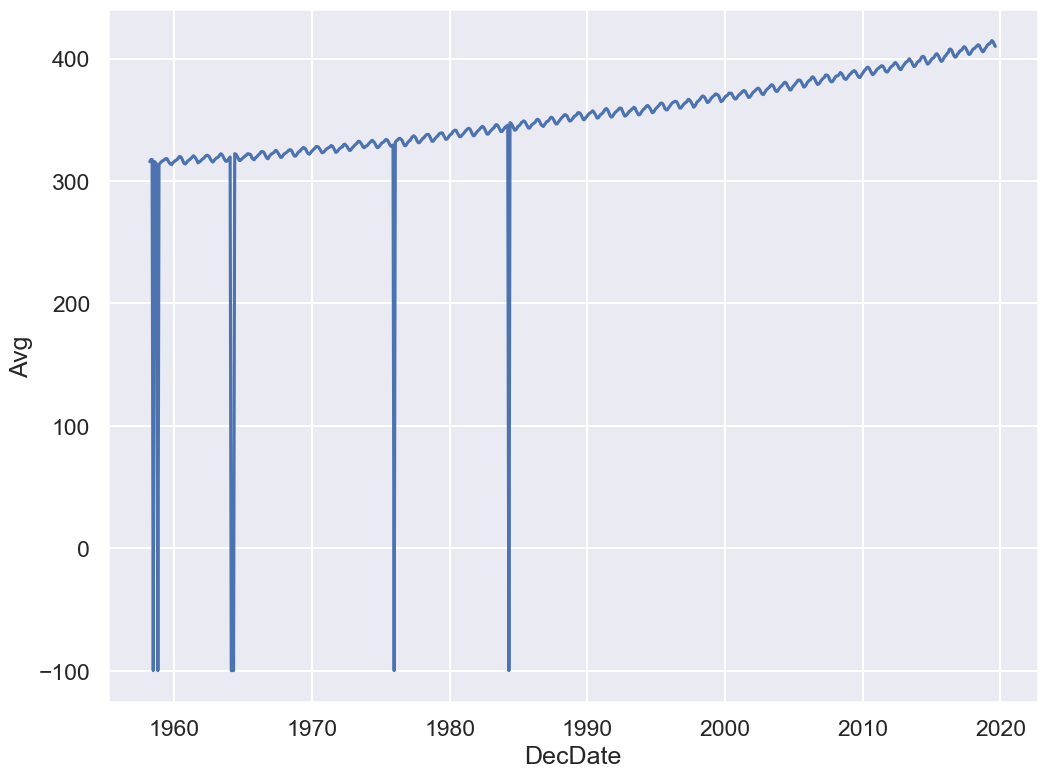

In [31]:
sns.lineplot(x='DecDate', y='Avg', data=co2);

The code above uses the `seaborn` plotting library (abbreviated `sns`).
We won't cover this library in detail until next week, so focus
on the plots themselves, not the code used to create them.


Yikes! Plotting the data uncovered a problem. It looks like we have some **missing values**. What happened here? 

In [32]:
co2.head()

,Yr,Mo,DecDate,Avg,Int,Trend,Days
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
3,1958,6,1958.46,-99.99,317.10,314.85,-1
4,1958,7,1958.54,315.86,315.86,314.98,-1


In [33]:
co2.tail()

,Yr,Mo,DecDate,Avg,Int,Trend,Days
733,2019,4,2019.29,413.32,413.32,410.49,26
734,2019,5,2019.38,414.66,414.66,411.20,28
735,2019,6,2019.46,413.92,413.92,411.58,27
736,2019,7,2019.54,411.77,411.77,411.43,23
737,2019,8,2019.62,409.95,409.95,411.84,29


Some data have unusual values like -1 and -99.99.

Let's check the description at the top of the file again.
1. -1 signifies a missing value for the number of days `Days` the equipment was in operation that month.
1. -99.99 denotes a missing monthly average `Avg`

How can we fix this? First, let's explore other aspects of our data. Understanding our data will help us decide what to do with the missing values.

<br/>

---

## Quality Checks: Reasoning about the data
First, we consider the shape of the data. How many rows should we have?
* If chronological order, we should have one record per month.
* Data from March 1958 to August 2019.
* We should have $ 12 \times (2019-1957) - 2 - 4 = 738 $ records.

In [33]:
co2.shape

(738, 7)

Nice!! The number of rows (i.e. records) match our expectations.

<br/><br/>

---

Let's now check the quality of each feature.

## Understanding Missing Value 1: `Days`
`Days` is a time field, so let's analyze other time fields to see if there is an explanation for missing values of days of operation.

Let's start with **months** `Mo`.

Are we missing any records? The number of months should have 62 or 61 instances (March 1957-August 2019).

In [35]:
co2["Mo"].value_counts().sort_index()

1     61
2     61
3     62
      ..
10    61
11    61
12    61
Name: Mo, Length: 12, dtype: int64

As expected Jan, Feb, Sep, Oct, Nov, and Dec have 61 occurrences and the rest 62.

<br/><br/>

Next let's explore **days** `Days` itself, which is the number of days that the measurement equipment worked.

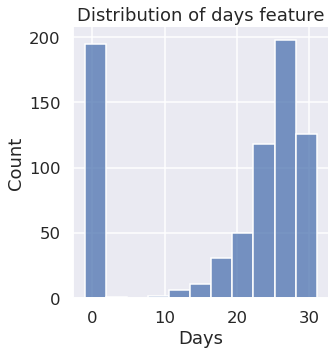

In [36]:
sns.displot(co2['Days']);
plt.title("Distribution of days feature")
plt.show() # suppresses unneeded plotting output

In terms of data quality, a handful of months have averages based on measurements taken on fewer than half the days. In addition, there are nearly 200 missing values--**that's about 27% of the data**!

<br/><br/>

Finally, let's check the last time feature, **year** `Yr`.

Let's check to see if there is any connection between missingness and the year of the recording.

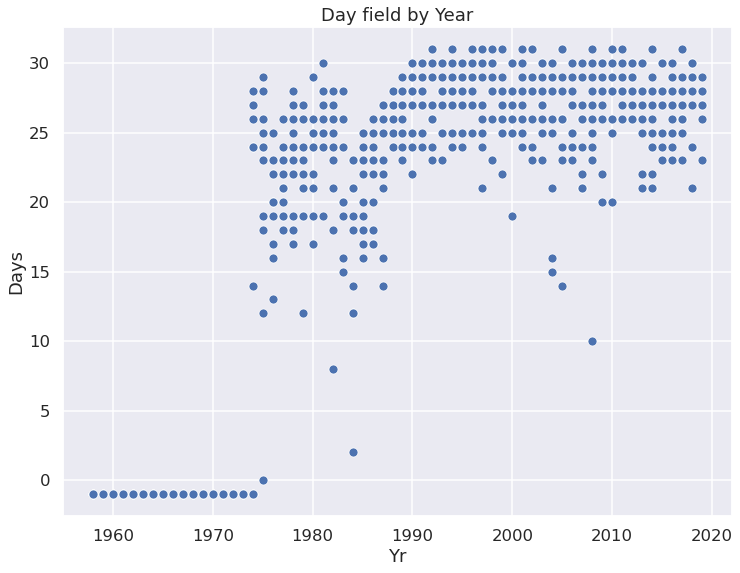

In [37]:
sns.scatterplot(x="Yr", y="Days", data=co2);
plt.title("Day field by Year"); # the ; suppresses output

**Observations**:

* All of the missing data are in the early years of operation.
* It appears there may have been problems with equipment in the mid to late 80s.

**Potential Next Steps**:
* Confirm these explanations through documentation about the historical readings.
* Maybe drop earliest recordings? However, we would want to delay such action until after we have examined the time trends and assess whether there are any potential problems.

---
<br/><br/>

## Understanding Missing Value 2: `Avg`
Next, let's return to the -99.99 values in `Avg` to analyze the overall quality of the CO2 measurements.

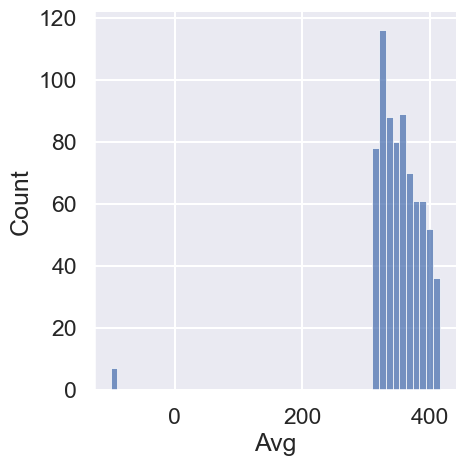

In [35]:
# Histograms of average CO2 measurements
sns.displot(co2['Avg']);

The non-missing values are in the 300-400 range (a regular range of CO2 levels).

We also see that there are only a few missing `Avg` values (**<1% of values**). Let's examine all of them:

In [34]:
co2[co2["Avg"] < 0]

,Yr,Mo,DecDate,Avg,Int,Trend,Days
3,1958,6,1958.46,-99.99,317.10,314.85,-1
7,1958,10,1958.79,-99.99,312.66,315.61,-1
71,1964,2,1964.12,-99.99,320.07,319.61,-1
72,1964,3,1964.21,-99.99,320.73,319.55,-1
73,1964,4,1964.29,-99.99,321.77,319.48,-1
213,1975,12,1975.96,-99.99,330.59,331.60,0
313,1984,4,1984.29,-99.99,346.84,344.27,2


There doesn't seem to be a pattern to these values, other than that most records also were missing `Days` data.

## Drop or Impute Missing `Avg` Data?

Remember we want to fix the following plot:

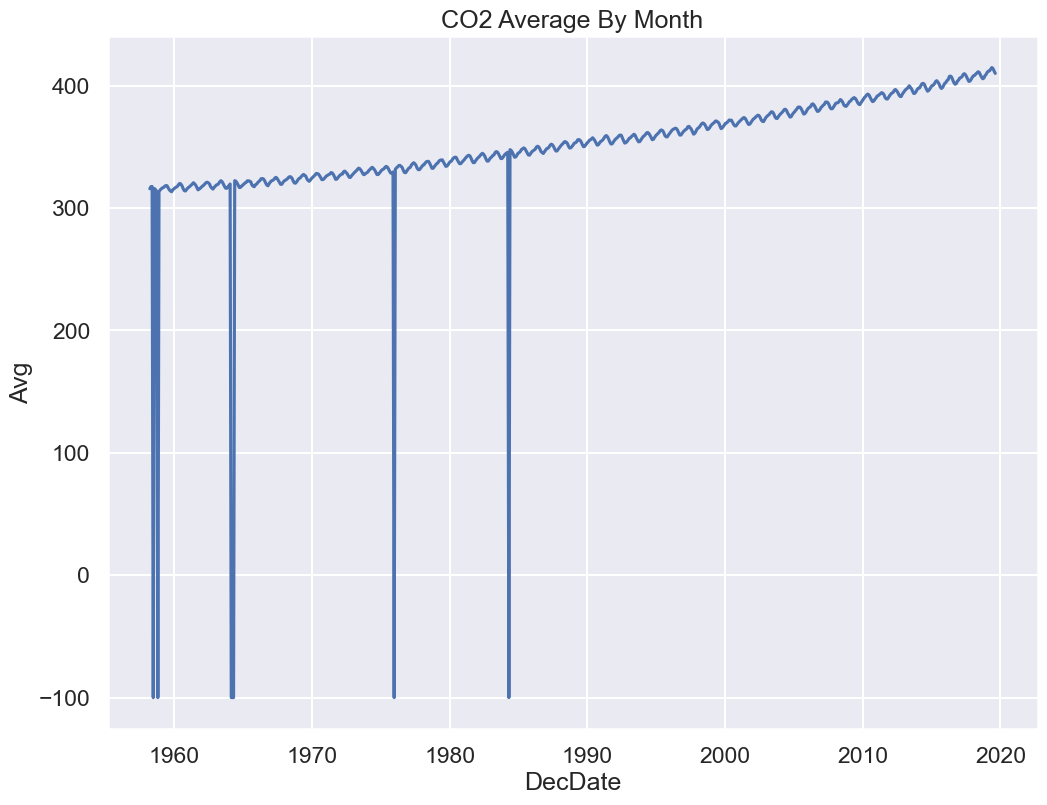

In [36]:
sns.lineplot(x='DecDate', y='Avg', data=co2)
plt.title("CO2 Average By Month");

Since we are plotting `Avg` vs `DecDate`, we should just focus on dealing with missing values for `Avg`.

Let's consider a few options:
1. Drop those records
1. Replace -99.99 with NaN
1. Substitute it with a likely value for the average CO2?

What do you think are the pros and cons of each possible action?

---
<br/><br/>
Let's examine each of these three options.

In [37]:
# 1. Drop missing values
co2_drop = co2[co2['Avg'] > 0]

# 2. Replace NaN with -99.99
co2_NA = co2.replace(-99.99, np.NaN)

We'll also use a third version of the data.
First, we note that the dataset already comes with a **substitute value** for the -99.99.

From the file description:

>  The `interpolated` column includes average values from the preceding column (`average`)
and **interpolated values** where data are missing.  Interpolated values are
computed in two steps...

The `Int` feature has values that exactly match those in `Avg`, except when `Avg` is -99.99, and then a **reasonable** estimate is used instead.
So, the third version of our data will use the `Int` feature instead of `Avg`.

In [38]:
# 3. Use interpolated column which estimates missing Avg values
co2_impute = co2.copy()
co2_impute['Avg'] = co2['Int']

<br/>

---

What's a **reasonable** estimate?

To answer this question, let's zoom in on a short time period, say the measurements in 1958 (where we know we have two missing values).


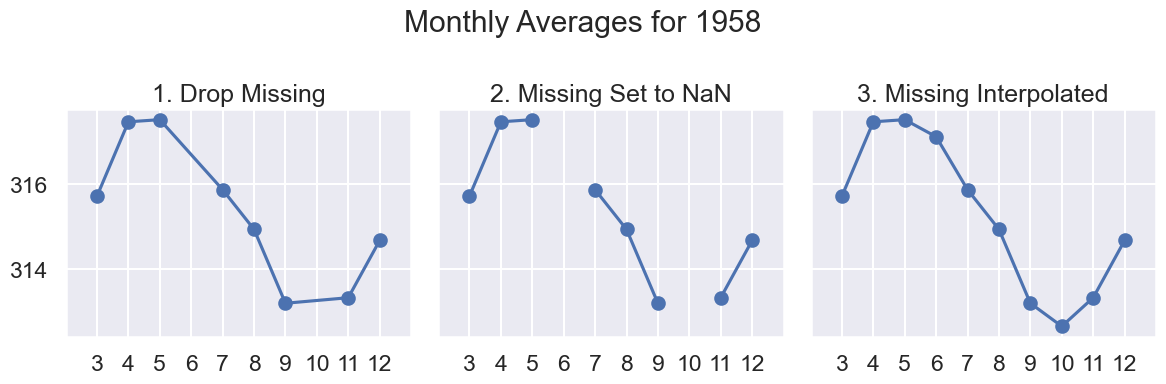

In [39]:
# results of plotting data in 1958

def line_and_points(data, ax, title):
    # assumes single year, hence Mo
    ax.plot('Mo', 'Avg', data=data)
    ax.scatter('Mo', 'Avg', data=data)
    ax.set_xlim(2, 13)
    ax.set_title(title)
    ax.set_xticks(np.arange(3, 13))

def data_year(data, year):
    return data[data["Yr"] == 1958]
    
# uses matplotlib subplots
# you may see more next week; focus on output for now
fig, axes = plt.subplots(ncols = 3, figsize=(12, 4), sharey=True)

year = 1958
line_and_points(data_year(co2_drop, year), axes[0], title="1. Drop Missing")
line_and_points(data_year(co2_NA, year), axes[1], title="2. Missing Set to NaN")
line_and_points(data_year(co2_impute, year), axes[2], title="3. Missing Interpolated")

fig.suptitle(f"Monthly Averages for {year}")
plt.tight_layout()

In the big picture since there are only 7 `Avg` values missing (**<1%** of 738 months), any of these approaches would work.

However there is some appeal to **option 3: Imputing**:
* Shows seasonal trends for CO2
* We are plotting all months in our data as a line plot

<br/>

---
Let's replot our original figure with option 3:

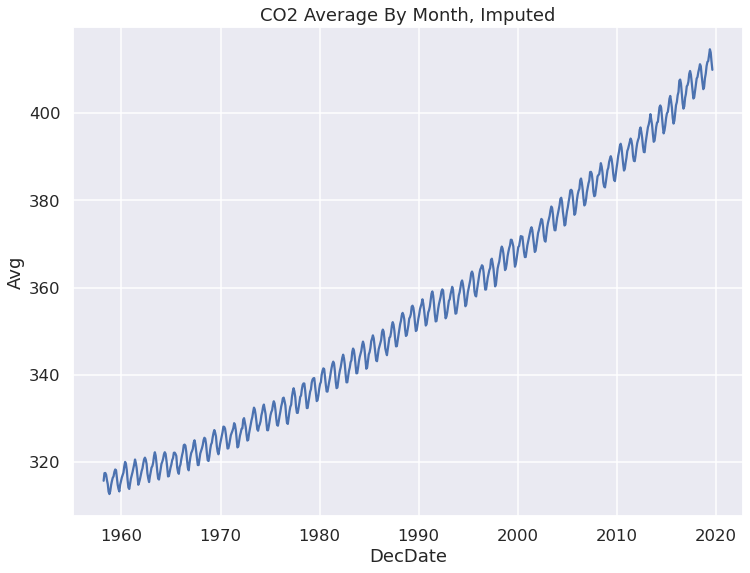

In [43]:
sns.lineplot(x='DecDate', y='Avg', data=co2_impute)
plt.title("CO2 Average By Month, Imputed");

Looks pretty close to what we see on the NOAA [website](https://gml.noaa.gov/ccgg/trends/)!

## Presenting the data: A Discussion on Data Granularity

From the description:
* monthly measurements are averages of average day measurements.
* The NOAA GML website has datasets for daily/hourly measurements too.

The data you present depends on your research question.

**How do CO2 levels vary by season?**
* You might want to keep average monthly data.

**Are CO2 levels rising over the past 50+ years, consistent with global warming predictions?**
* You might be happier with a **coarser granularity** of average year data!

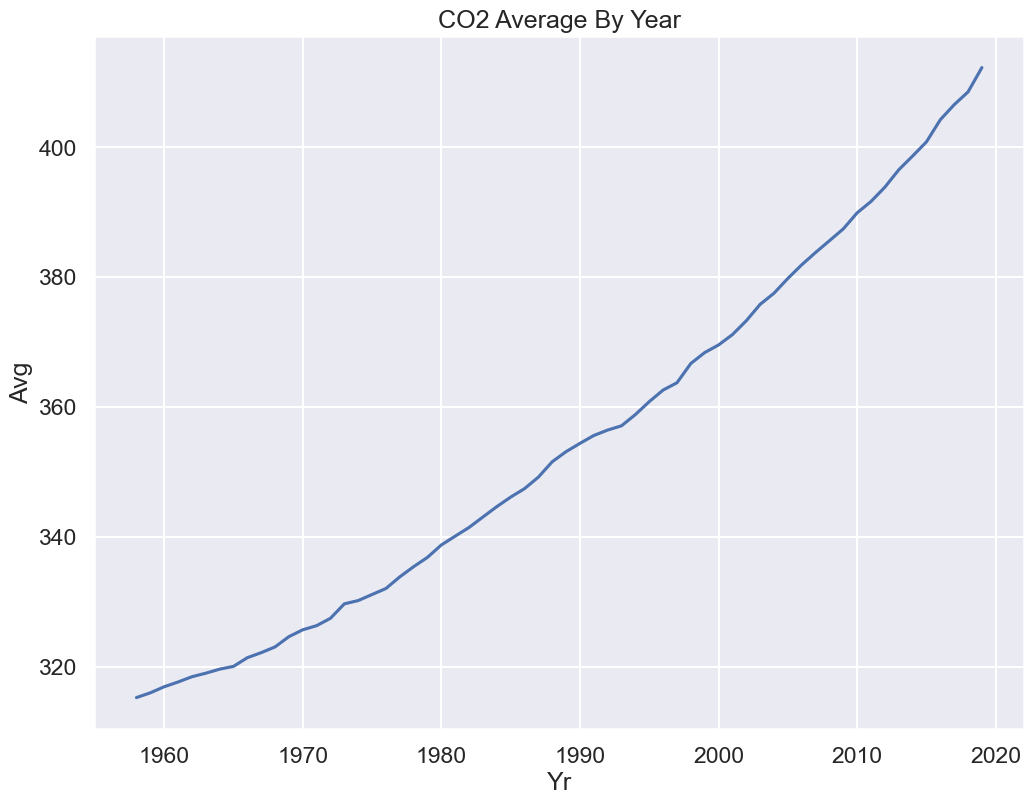

In [40]:
co2_year = co2_impute.groupby('Yr').mean()
sns.lineplot(x='Yr', y='Avg', data=co2_year)
plt.title("CO2 Average By Year");

Indeed, we see a rise by nearly 100 ppm of CO2 since Mauna Loa began recording in 1958.